## Nächste-Nachbarn-Klassifikation

### Einführung 
<img width="100%" class="imgright" src="Images/NearestNeighborsKlassifizierung.png" /><br><br>

Die Nächste Nachbarn Klassifikation (Nearest Neighbors Classification) ist ein Verfahren, welches auf der Ähnlichkeit von Samples und ihren Features beruht. Samples werden verglichen mit einem Ähnlichkeitsmaß, welches dem Abstand der Samples in einem Feature-Raum entspricht, wobei die Zahl der Dimensionen dieses Raums der Anzahl der Features entspricht.
Wir wollen dies in einem einfachen zweidimensionalen Beispiel näher erläutern. Wir haben hier Autos (Familienkutschen und Sportwagen) nach PS-Zahl und Gewicht aufgetragen.


<img width="100%" class="imgright" src="Images/KNN1.png" /><br><br>

Wo würden wir jetzt ein unbekanntes Fahrzeug einordnen?

<img width="100%" class="imgright" src="Images/KNN2.png" /><br><br>

Aufgrund zur Nähe zu den nächsten Autos sicher als Sportwagen. Dies ist das Grundprinzip des NN Klassifikators. Eine Verfeinerung wäre, wieviele Nachbarn für den neuen Punkt gecheckt werden, zu welcher Klasse diese Nachbarn gehören. Dies ist ein Parameter des Verfahrens, es heißt deshalb auch <b>k-Nächste-Nachbarn Klassifikation<b/> und der Wert k ist eben die Anzahl der gesuchten nächsten Nachbarn. Hier unser Beispiel für k=3.<br><br><img width="100%" class="imgright" src="Images/KNN3.png" /><br><br>
    

Die nächsten 3 Nachbarn sind Sportwagen, daher ist es einfach zu bestimmen, daß auch unser Testauto ein  Sportwagen sein wird. Was aber, wenn der Testwagen an dieser Stelle steht bei k=5?<br><br><img width="100%" class="imgright" src="Images/KNN4.png" /><br><br>

Hier hätten wir Nachbarn aus verschiedenen Klassen, welche setzt sich durch? Es gibt verschiedene Möglichkeiten:<br><br>
Es bestimmt nur der <b>nächste</b> Nachbar die Klassenzugehörigkeit<br><br>
Es bestimmt die Mehrheit der Klassen der nächsten Nachbarn, bei Gleichstand entscheidet der Zufall.(voting)<br><br>
Es bestimmt die Mehrheit, aber der Abstand eines jeden Nachbarn fließt in die Berechnung ein, je näher desto mehr Wahrscheinlichkeit, daß dies die richtige Klasse ist.(weighted voting)
<br><br> Alle diese Konzepte und mehr können verwendet werden.
<br> Außerdem ergibt sich die Frage, wie der Abstand gemessen wird.<br>

In n-dimensionalen Vektorräumen benutzt man meistens einer der folgenden drei Abstandsmetriken:<br>

<b>Euklidischer-Abstand</b><br>

Der euklidische Abstand zwischen zwei Punkten x und y entweder in der Ebene oder im 3-dimensionalen Raum entspricht der Länge der Strecke, die diese beiden Punkte verbindet. Es kann aus den kartesischen Koordinaten der Punkte mit dem Satz des Pythagoras berechnet werden, daher wird es gelegentlich auch die Pythagoros-Entfernung bezeichnet. Die allgemeine Formel lautet:

$$d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i -y_i)^2}$$
 
<b>Manhatten-Abstand</b><br>

Es ist definiert als die Summe der absoluten Werte zwischen den Koordinaten von x und y :

$$d(x, y) = \sum_{i=1}^{n} |x_i -y_i|$$
 
<b>Minkowski-Abstand</b><br>

Der Minkowski-Abstand verallgemeinert den Euklidischen und Manhatten-Abstand in einer Distanzmetrik. Wenn wir den Parameter p in der folgenden Formel auf 1 einstellen, erhalten wir den Manhatten-Abstand, und mit dem Wert 2 erhalten wir den Euklidischen-Abstand:

$$d(x, y) = { \left(\sum_{i=1}^{n} (x_i -y_i)^p \right)}^{\frac{1}{p}}$$
 
<br>Das folgende Diagramm veranschaulicht den Zusammenhang zwischen Manhatten- und Euklidschem Abstand:
<img width=45% src="Images/manhattan_distance_visualization.png"  alt="Manhattan and Euclidean distance" />
<br>
Die blaue Linie veranschaulicht den Euklidschen Abstand zwischen dem grünen und dem roten Punkt. Ansonsten kann man sich auch über die orange, grüne oder gelbe Linie vom grünen Punkt zum roten Punkt bewegen. Die Linien entsprechen der Manhatten-Distanz. Die Länge ist jeweils gleich.<br><br><br>
Wir werden jetzt einen einfachen NN Klassifikator von Grund auf bauen. Zunächst wird nur der nächste Nachbar, also ein Punkt bestimmt und dessen Label übernommen.

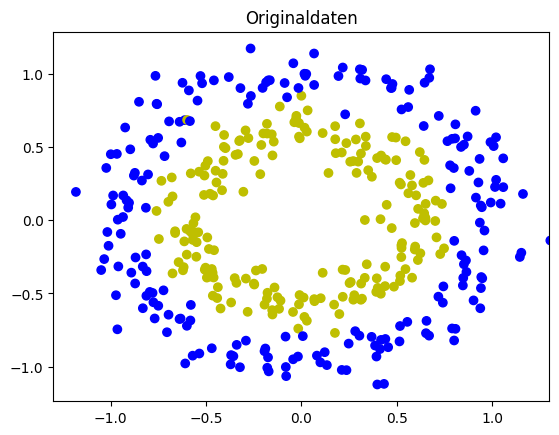

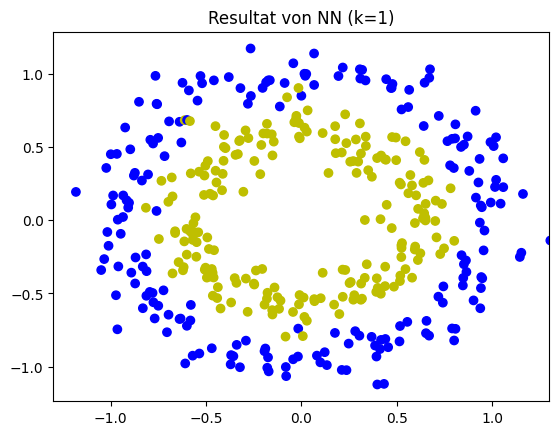

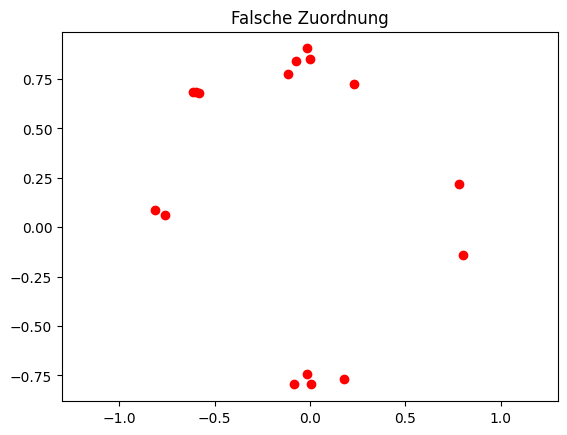

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles 
import numpy as np

X,y = make_circles(400,random_state=42,noise=.1,factor=.6)
colormap=np.array(["b","y"])
plt.xlim(-1.3,1.3)
plt.title("Originaldaten")
plt.scatter(X[:,0],X[:,1],color=colormap[y])
plt.show()
k=1 #nur nächsten Nachbarn 0 in der Nachbarliste ist der Punkt selbst 1 der nächste Nachbar
def make_distance(p1,p2):
    dx,dy=p1[0]-p2[0],p1[1]-p2[1]      
    return np.sqrt(dx**2+dy**2) 

def neighbour_list (X):
    xs=np.column_stack([X[:,0],X[:,1]])
    ys=np.column_stack([X[:,0],X[:,1]])    
    return np.array([[np.linalg.norm(i-j) for j in xs] for i in ys]) #alle Distanzen aller Punkte in 2 dim Array


my_list=neighbour_list(X) 
ResX,Resy=np.zeros(shape=(len(X),2)),np.zeros(len(X)).astype(int)

for index  in range(len(X)):
    neighbours_sorted=np.sort(my_list[index]) #sortiere Nachbarliste   
    ind=np.where(my_list[index]==neighbours_sorted[k])#[0][0] #nimm kleinsten Abstand und gib Index in X aus
    #print(neighbours_sorted[k])
    #print(neighbours_sorted[k])[0]
    #input()
    Resy[index]=y[ind]                                      
 
plt.xlim(-1.3,1.3)
plt.title("Resultat von NN (k=1)")
plt.scatter(X[:,0],X[:,1],color=colormap[Resy]) 
plt.show()
res_False=np.where(Resy!=y)
plt.title("Falsche Zuordnung")

plt.xlim(-1.3,1.3)
plt.scatter(X[res_False][:,0],X[res_False][:,1],color="red")

Jetzt werden wir die n nächsten Punkte bestimmen und dann voten, der häufigste Label wird genommen, bei Gleichstand Random.

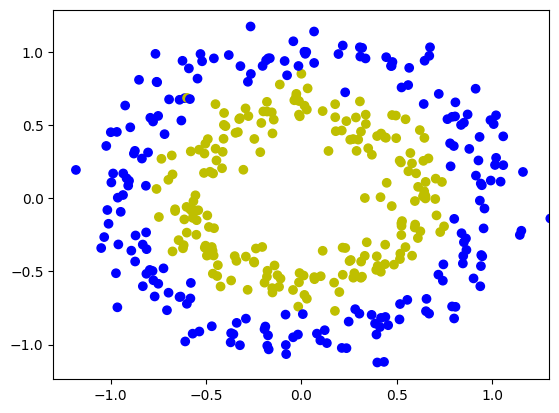

K-Wert: 9


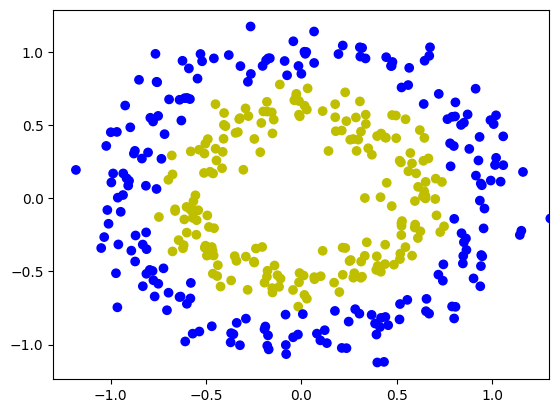

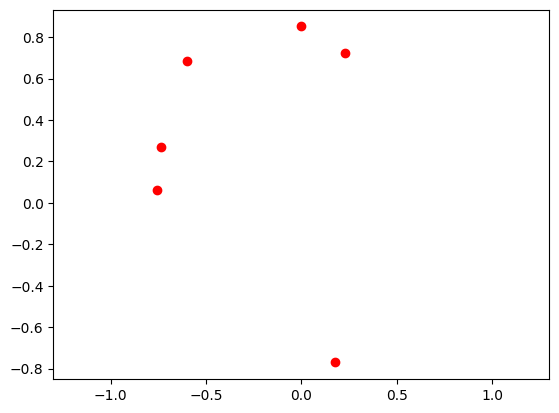

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles 
import numpy as np


X,y = make_circles(400,random_state=42,noise=.1,factor=.6)
colormap=np.array(["b","y"])
plt.xlim(-1.3,1.3)
plt.scatter(X[:,0],X[:,1],color=colormap[y])
plt.show()

k=int(input("K-Wert: "))
def make_distance(p1,p2):
    dx,dy=p1[0]-p2[0],p1[1]-p2[1]      
    return np.sqrt(dx**2+dy**2) 

def neighbour_list (X):
    xs=np.column_stack([X[:,0],X[:,1]])
    ys=np.column_stack([X[:,0],X[:,1]])    
    return np.array([[np.linalg.norm(i-j) for j in xs] for i in ys])

def vote(lab_list):
    labels,count=np.array(np.unique(lab_list,return_counts=True))
    return  labels[np.argmax(count)]

my_list=neighbour_list(X)
ResX,Resy=np.zeros(shape=(len(X),2)),np.zeros(len(X)).astype(int)

for index  in range(len(X)):
    neighbours_sorted=np.sort(my_list[index])
    indexes=neighbours_sorted[1:k+1]
    
    label_list=np.zeros(k).astype(int)
    for _ in range(k):
        ind=np.where(my_list[index]==indexes[_]) 
        label_list[_]=int(y[ind[0]]) 
    Resy[index]=vote(label_list)                                    
 
plt.xlim(-1.3,1.3)                             
plt.scatter(X[:,0],X[:,1],color=colormap[Resy]) 
plt.show()
res_False=np.where(Resy!=y)
plt.xlim(-1.3,1.3)
plt.scatter(X[res_False][:,0],X[res_False][:,1],color="red")

Für welchen k-Wert bekommen wir das beste Ergebnis? In diesem Fall bei k ≈ 10.

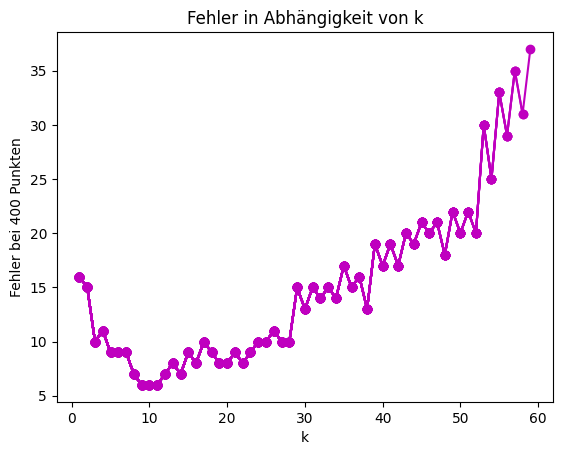

In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles 
import numpy as np


X,y = make_circles(400,random_state=42,noise=.1,factor=.6)
my_list=neighbour_list(X)

def make_distance(p1,p2):
    dx,dy=p1[0]-p2[0],p1[1]-p2[1]      
    return np.sqrt(dx**2+dy**2) 

def neighbour_list (X):
    xs=np.column_stack([X[:,0],X[:,1]])
    ys=np.column_stack([X[:,0],X[:,1]])    
    return np.array([[np.linalg.norm(i-j) for j in xs] for i in ys])

def vote(lab_list):
    labels,count=np.array(np.unique(lab_list,return_counts=True))
    return  labels[np.argmax(count)]
ks,fehler=[],[]
    
for k in range(1,60):  
    
    Resy=np.zeros(len(X)).astype(int)

    for index  in range(len(X)):
        neighbours_sorted=np.sort(my_list[index])
        indexes=neighbours_sorted[1:k+1]

        label_list=np.zeros(k).astype(int)
        for _ in range(k):
            ind=np.where(my_list[index]==indexes[_]) 
            label_list[_]=int(y[ind[0]]) 
        Resy[index]=vote(label_list) 
    
    res_False=np.where(Resy!=y)
    ks.append(k)
    fehler.append(len(X[res_False]))
    
    
    plt.title("Fehler in Abhängigkeit von k")
    plt.xlabel("k")
    plt.ylabel("Fehler bei 400 Punkten")
    plt.plot(ks,fehler, 'om-')
    

Wir wollen jetzt den NN Klassifikator von sklearn verwenden. ```neighbors``` ist ein Paket des sklearn Moduls für  Nächste-Nachbarn-Klassifikatoren.<br>
Es werden verschiedene Entfernungsbestimmungsmethoden unterstützt.
<br>
scikit-learn bietet zwei grundsätzlich verschiedene nächste-Nachbarn-Klassifikatoren:<br>

<b>K-Nächster-Nachbar</b><br>
basiert auf den k-nächsten Nachbarn der Stichprobe, die zu klassifizieren sind. Der Wert `k` ist unser vorgesteller Hyperparameter.<br>
<br><b>Radius-Nächster-Nachbar</b><br>
basiert auf der Anzahl der Nachbarn einer Stichprobe innerhalb eines festen Umkreises `r`. `r` ist ein Hyperparameter des Typs `float`. Dieser Klassifikationstyp wird seltener angewendet.<br><br><br>

### K-Nächster Nachbarn Klassifizierer<br>
Wir erstellen einen Datensatz mit drei Klassen von insgesamt 500 Punkten mit x- und y-Wert die um drei Zentren normalverteilt liegen, um den K-Nächster Nachbarn Klassifizierer von sklearn.neighbors zu testen. Dabei legen wir die 3 Center der Punktwolken mit [x,y] Listen fest.<br>

Die ersten 5 Punkte mit ihren Label werden unten angezeigt.


[[5.95446575 9.35528451]
 [5.84086156 4.89711278]
 [4.52462712 5.47761018]
 [2.98633519 3.2135339 ]
 [4.1911528  5.55743945]] [2 1 1 0 1]


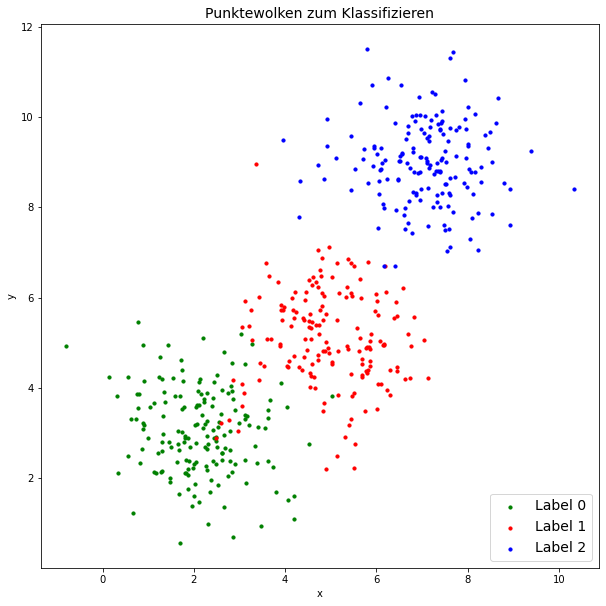

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
centers = [[2, 3], [5, 5], [7, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=500, 
                          centers=np.array(centers),
                          random_state=1)
print(data[:5],labels[:5])
colours = ('green', 'red', 'blue')
n_classes = 3


plt.figure(figsize=(10,10))
plt.title("Punktewolken zum Klassifizieren",fontsize=14)
plt.xlabel("x")
plt.ylabel("y")
for n_class in range(0, n_classes):
    plt.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label="Label "+str(n_class))

plt.legend(loc='lower right',fontsize=14)

Wir sind nun bereit die Klassifikation mit `kNeighborsClassifier` durchzuführen. Wir zeigen unsere ersten 20 Punkte an mit ihren echten Label und den vorhergesagten Label.

In [4]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data, labels) 

KNeighborsClassifier() #alle Parameter stehen auf default k=5
predicted = knn.predict(data)
print("Ergebnisse der Klassifikation:")
print(predicted[:20])
print("Sollwerte:")
print(labels[:20])

Ergebnisse der Klassifikation:
[2 1 1 0 1 0 1 1 1 2 2 2 2 0 1 1 0 2 0 1]
Sollwerte:
[2 1 1 0 1 0 1 1 1 2 2 2 2 0 1 1 0 2 0 1]


sklearn bietet uns mit dem metrics Paket eine einfache Auswertmöglichkeit an.

In [5]:
from sklearn.metrics import accuracy_score
print(f" Accuracy: {accuracy_score(predicted, labels)}")

 Accuracy: 0.97


Hier die falschen Zuordnungen:

In [13]:
for i in range(len(data)):
    if predicted[i]!=labels[i]:
        print(f" Punkt: {data[i]} Echte Klasse: {labels[i]} Vorausgesagt: {predicted[i]}")

 Punkt: [4.52832571 2.75136522] Echte Klasse: 0 Vorausgesagt: 1
 Punkt: [2.96279877 3.05741082] Echte Klasse: 1 Vorausgesagt: 0
 Punkt: [3.27375593 4.96710175] Echte Klasse: 0 Vorausgesagt: 1
 Punkt: [2.49355935 2.88583608] Echte Klasse: 1 Vorausgesagt: 0
 Punkt: [3.36255041 8.9586027 ] Echte Klasse: 1 Vorausgesagt: 2
 Punkt: [2.77288737 3.3006664 ] Echte Klasse: 1 Vorausgesagt: 0
 Punkt: [3.0388246  5.18697965] Echte Klasse: 0 Vorausgesagt: 1
 Punkt: [2.85753327 4.16983114] Echte Klasse: 1 Vorausgesagt: 0
 Punkt: [6.40753871 6.69509206] Echte Klasse: 2 Vorausgesagt: 1
 Punkt: [3.13162939 4.51981682] Echte Klasse: 0 Vorausgesagt: 1
 Punkt: [3.90465871 4.1110567 ] Echte Klasse: 0 Vorausgesagt: 1
 Punkt: [2.586497   3.22243362] Echte Klasse: 1 Vorausgesagt: 0
 Punkt: [5.03085711 3.82458463] Echte Klasse: 0 Vorausgesagt: 1
 Punkt: [6.16001109 6.70179412] Echte Klasse: 2 Vorausgesagt: 1
 Punkt: [3.04789471 3.59767085] Echte Klasse: 1 Vorausgesagt: 0


Oder visualisiert (schwarz=falsche Zuordnung):

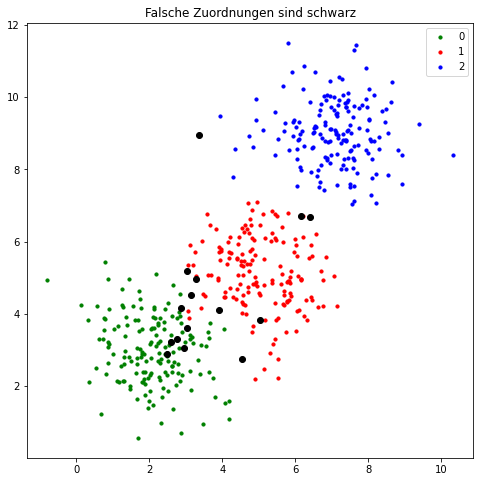

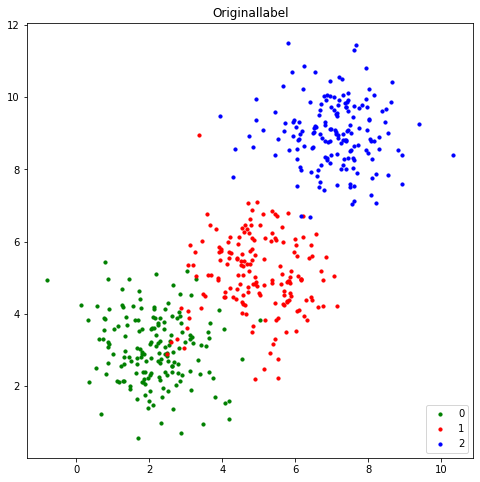

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
colours = ('green', 'red', 'blue')
n_classes = 3

plt.figure(figsize=(8,8))
plt.title("Falsche Zuordnungen sind schwarz")
for n_class in range(0, n_classes):
    plt.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))
for i in range(len(data)):
    if predicted[i]!=labels[i]:
        plt.scatter(data[i][0],data[i][1],c="black")


plt.legend(loc='upper right');
plt.show()

plt.figure(figsize=(8,8))
plt.title("Originallabel")
colours = ('green', 'red', 'blue')
n_classes = 3


for n_class in range(0, n_classes):
    plt.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))



plt.legend(loc='lower right');

Hier zeigen wir, wie robust die Methode im Hinblick auf den Parameter k ist.

Ergebnisse der Klassifikation:
 k: 1 Accuracy: 1.0
 k: 2 Accuracy: 0.98
 k: 3 Accuracy: 0.978
 k: 4 Accuracy: 0.97
 k: 5 Accuracy: 0.97
 k: 6 Accuracy: 0.966
 k: 7 Accuracy: 0.968
 k: 8 Accuracy: 0.964
 k: 9 Accuracy: 0.964
 k: 10 Accuracy: 0.964
 k: 11 Accuracy: 0.964
 k: 12 Accuracy: 0.964
 k: 13 Accuracy: 0.964
 k: 14 Accuracy: 0.964
 k: 15 Accuracy: 0.962
 k: 16 Accuracy: 0.962
 k: 17 Accuracy: 0.964
 k: 18 Accuracy: 0.964
 k: 19 Accuracy: 0.966
 k: 20 Accuracy: 0.962
 k: 21 Accuracy: 0.962
 k: 22 Accuracy: 0.962
 k: 23 Accuracy: 0.962
 k: 24 Accuracy: 0.964
 k: 25 Accuracy: 0.962
 k: 26 Accuracy: 0.962
 k: 27 Accuracy: 0.96
 k: 28 Accuracy: 0.96
 k: 29 Accuracy: 0.96
 k: 30 Accuracy: 0.96
 k: 31 Accuracy: 0.96
 k: 32 Accuracy: 0.96
 k: 33 Accuracy: 0.96
 k: 34 Accuracy: 0.962
 k: 35 Accuracy: 0.962
 k: 36 Accuracy: 0.962
 k: 37 Accuracy: 0.962
 k: 38 Accuracy: 0.962
 k: 39 Accuracy: 0.962
 k: 40 Accuracy: 0.962
 k: 41 Accuracy: 0.962
 k: 42 Accuracy: 0.962
 k: 43 Accuracy: 0.962
 

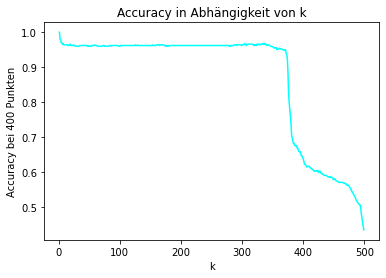

In [8]:
#lange Laufzeit
from sklearn.neighbors import KNeighborsClassifier
print("Ergebnisse der Klassifikation:")
ks,Acc=[],[]
for k in range(1,500):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data, labels) 

    KNeighborsClassifier() #alle Parameter stehen auf default 5
    predicted = knn.predict(data)
    if k<50: 
        print(f" k: {k} Accuracy: {accuracy_score(predicted, labels)}")
    ks.append(k)
    Acc.append(accuracy_score(predicted, labels))
plt.title("Accuracy in Abhängigkeit von k")
plt.xlabel("k")
plt.ylabel("Accuracy bei 400 Punkten")
plt.plot(ks,Acc, color="cyan")

Hier zeigen wir die Entscheidunggrenzen für einen Klassifizierer einem frei wählbaren k-Wert. Die schwarzen Punkte sind falsch klassifiziert.


k: 7


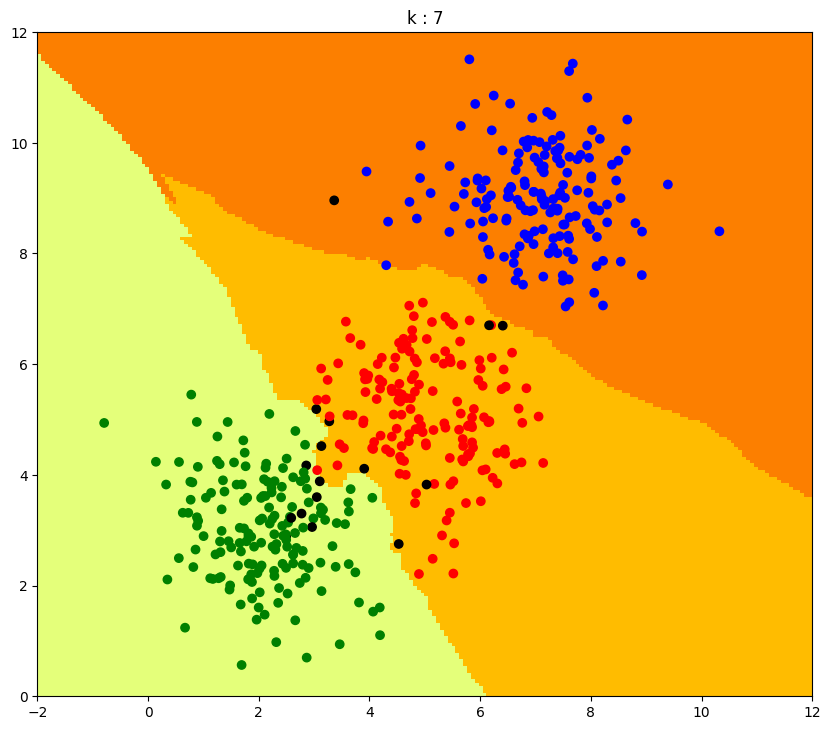

In [16]:
from matplotlib.pyplot import figure
colours = np.array(['green', 'red','blue',"black"])

def plot_background_image(f, xres=200, yres=200, extent = (-2,12,0,12)):
    left,right,bottom,top = extent
    x_values=np.linspace(left,right,xres)
    y_values=np.linspace(bottom,top,yres)
    x1,y1=np.meshgrid(x_values,y_values)
    pixels=xres*yres
    x1 = x1.reshape(pixels,1)
    y1 = y1.reshape(pixels,1)
    X_grid=np.column_stack((x1, y1))
    Z=f(X_grid).reshape(xres,yres)
    plt.imshow(Z,origin="lower",extent=extent, cmap="Wistia")
    return
#Plotgröße setzen (sonst unterschiedlich große Plots wenn plot_background_image nicht immer verwendet wird)
plt.figure(figsize=(10,10))


n_classes = 3
k=int(input("k: "))
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(data, labels) 
plot_background_image(knn.predict)#,extent=(0,10,0,12))
result=knn.predict(data)
result=np.where(result!=labels,3,result)

result.reshape(len(data),1)
  
plt.title(f"k : {k}")
plt.scatter(data[:,0],data[:,1],c=colours[result])
plt.show()






Wir erkennen, daß bei kleinen k-Werten die Entscheidungsgrenze sehr zerklüftet ist. Dies führt für die Testdatensätze mit Sicherheit zu overfitting, wie wir hier zeigen können. Wir haben jetzt 600 Werte in 400 Trainingsdaten und 200 Testdaten aufgeteilt und beziehen die Accuracy auf die Testdaten. Eindeutig ist erst ein Overfitting zu sehen und dann ab ca.  k=30 beginnt ein leichtes Underfitting. Ab ca. k=270 stürzt die Accuracy dann regelrecht ab.

Ergebnisse der Klassifikation von:


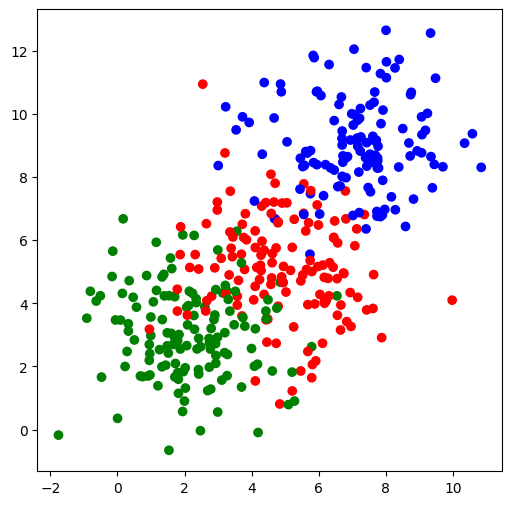

 k: 1 Accuracy: 0.855
 k: 2 Accuracy: 0.865
 k: 3 Accuracy: 0.87
 k: 4 Accuracy: 0.87
 k: 5 Accuracy: 0.875
 k: 6 Accuracy: 0.895
 k: 7 Accuracy: 0.89
 k: 8 Accuracy: 0.895
 k: 9 Accuracy: 0.9
 k: 10 Accuracy: 0.895
 k: 11 Accuracy: 0.91
 k: 12 Accuracy: 0.905
 k: 13 Accuracy: 0.905
 k: 14 Accuracy: 0.9
 k: 15 Accuracy: 0.915
 k: 16 Accuracy: 0.905
 k: 17 Accuracy: 0.915
 k: 18 Accuracy: 0.91
 k: 19 Accuracy: 0.915
 k: 20 Accuracy: 0.905
 k: 21 Accuracy: 0.915
 k: 22 Accuracy: 0.92
 k: 23 Accuracy: 0.92
 k: 24 Accuracy: 0.92
 k: 25 Accuracy: 0.915
 k: 26 Accuracy: 0.92
 k: 27 Accuracy: 0.915
 k: 28 Accuracy: 0.915
 k: 29 Accuracy: 0.925
 k: 30 Accuracy: 0.925
 k: 31 Accuracy: 0.93
 k: 32 Accuracy: 0.93
 k: 33 Accuracy: 0.925
 k: 34 Accuracy: 0.925
 k: 35 Accuracy: 0.92
 k: 36 Accuracy: 0.925
 k: 37 Accuracy: 0.92
 k: 38 Accuracy: 0.92
 k: 39 Accuracy: 0.925
 k: 40 Accuracy: 0.915
 k: 41 Accuracy: 0.925
 k: 42 Accuracy: 0.915
 k: 43 Accuracy: 0.925
 k: 44 Accuracy: 0.92
 k: 45 Accuracy:

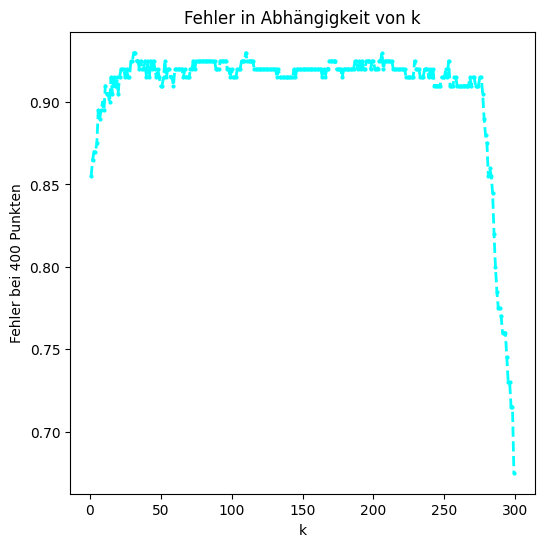

In [17]:
plt.rcParams["figure.figsize"]=6,6
from sklearn.neighbors import KNeighborsClassifier
print("Ergebnisse der Klassifikation von:")
ks,Acc=[],[]
centers = [[2, 3], [5, 5], [7, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=600,cluster_std=1.5, 
                          centers=np.array(centers),
                          random_state=1)

plt.scatter(data[:400,0],data[:400,1],c=colours[labels[:400]])
plt.show()
for k in range(1,300):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(data[:400], labels[:400]) 

    KNeighborsClassifier() #alle Parameter stehen auf default 5
    
    predicted = knn.predict(data[400:])
    if k<50:
        print(f" k: {k} Accuracy: {accuracy_score(predicted, labels[400:])}")
    ks.append(k)
    Acc.append(accuracy_score(predicted, labels[400:]))
plt.title("Fehler in Abhängigkeit von k")
plt.xlabel("k")
plt.ylabel("Fehler bei 400 Punkten")
plt.plot(ks, Acc, color='cyan', marker='o', linestyle='dashed',
     linewidth=2, markersize=2)
#plt.plot(ks,Acc, "og")

### Radius Neighbors Classifier

Die Arbeitsweise des k-Nächsten-Nachbarnklassifikators besteht darin, einen Kreis um die zu klassifizierende Stichprobe zu bestimmen der genau k Elemente enthält. Der Radius-Nachbarn-Klassifikator hingegen hat eine feste Länge für den Radius des umgebenden Kreis. Es lokalisiert alle Elemente in den Trainingsdaten, die sich innerhalb dieses Kreis mit der angegebenen Radiuslänge befinden. Als Folge des festen Radiusansatzes bieten dichte Regionen der Stichprobenverteilung mehr Informationen und dünnbesetzte Regionen bieten weniger Informationen, was sich oft als vorteilhaft erweist. Hier erreichen wir für die dünn besetzte Punktwolke eine optimale Accuracy.

Accuracy: 1.0


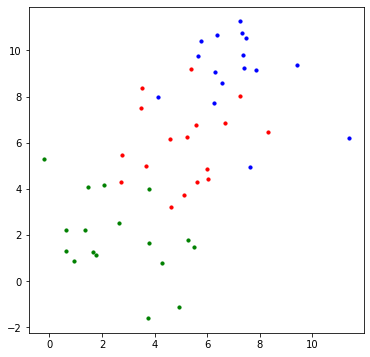

In [12]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=6,6
centers = [[2, 3], [5, 5], [7, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=50, 
                          centers=np.array(centers),
                          cluster_std = 2,
                          random_state=1)


import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))

rnn = RadiusNeighborsClassifier(radius=0.5)
rnn.fit(data, labels)

predicted = rnn.predict(data)

print(f"Accuracy: {accuracy_score(predicted, labels)}")

Nun wollen wir dies mit dem normalen k-Nächsten-Nachbarn-Klassifikator vergleichen:

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(data, labels) 
KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=6, 
                     p=2,         # p=2 is equivalent to euclidian distance
                     weights='uniform')

predicted = knn.predict(data)
print(f"Accuracy: {accuracy_score(predicted, labels)}")

Accuracy: 0.8983333333333333


Bei dünn besetzten Räumen empfiehlt sich also der Radius-KN Klassifizierer. 